In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv('/content/drive/MyDrive/Final Project/DataSet/thinking.csv')


X = df[['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']]
y = df['Label'] 

y = pd.factorize(y)[0]z

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)


In [ ]:

model = Sequential()
model.add(Conv1D(64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.0624 - loss: 2.7784 - val_accuracy: 0.0634 - val_loss: 2.7727
Epoch 2/10
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.0620 - loss: 2.7727 - val_accuracy: 0.0623 - val_loss: 2.7728
Epoch 3/10
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.0623 - loss: 2.7728 - val_accuracy: 0.0623 - val_loss: 2.7728
Epoch 4/10
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.0622 - loss: 2.7728 - val_accuracy: 0.0619 - val_loss: 2.7728
Epoch 5/10
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.0623 - loss: 2.7728 - val_accuracy: 0.0613 - val_loss: 2.7727
Epoch 6/10
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.0622 - loss: 2.7728 - val_accuracy: 0.0625 - val_loss: 2.7729
Epoch 7/10
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.0618 - loss: 2.7728 - val_accuracy: 0.0634 - val_loss: 2.7727
Epoch 8/10
10752/10752 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 

In [7]:

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


5760/5760 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
Accuracy: 0.0619140625
Precision: 0.0038333511352539058
Recall (Sensitivity): 0.0619140625
F1 Score: 0.007219701236895347
Confusion Matrix:
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0 11593]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0 11633]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0 11404]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0 11567]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0 11409]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0 11507]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0 11520]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0 11562]
 [    0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


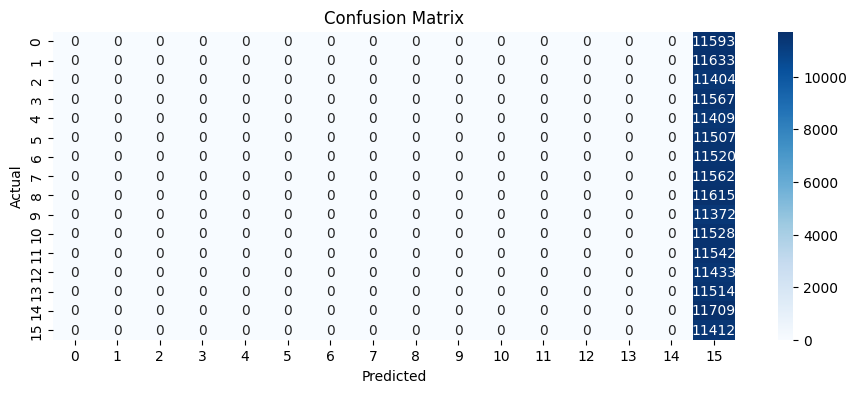

In [9]:
#Confusion Matrix
plt.figure(figsize=(11, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


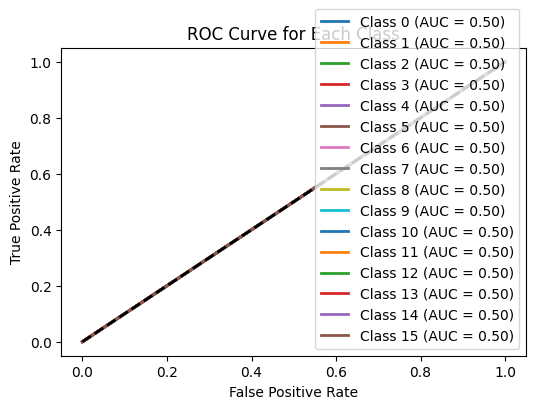

In [10]:
#ROC Curve
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y))

plt.figure(figsize=(6, 4))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="lower right")
plt.show()


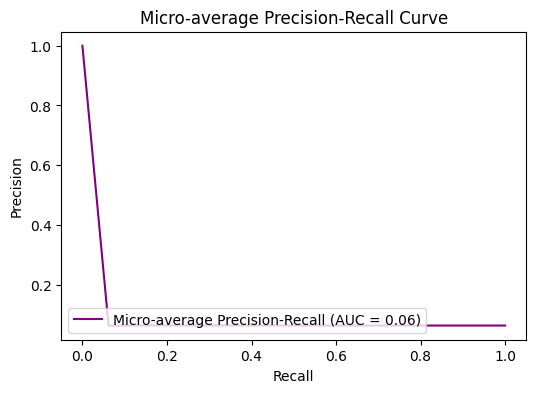

In [11]:
#PR Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_proba.ravel())
average_precision = average_precision_score(y_test_bin, y_pred_proba, average="micro")

plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals, color='purple', label=f"Micro-average Precision-Recall (AUC = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Micro-average Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


In [13]:

model.save('1d_cnn_model.h5')

with open("1DCNN_model_metrics.txt", "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"Recall (Sensitivity): {recall}\n")
    f.write(f"F1 Score: {f1}\n")
    f.write(f"Confusion Matrix:\n{conf_matrix}\n")
